
<h2>Etapa da metodologia CRISP-DM: Data Understanding, Data Preparation</h2>
<h3>Trabalho Final - Entrega Parcial</h3>    

<hr style="height:2px"> 


## Descrição

Dado a correlação entre dois conjuntos de dados, Perfil do Candidato 2022 e Motivo Cassação2022, dentro do escopo dos estados do Sudeste do Brasil,pretendemos calculara porcentagem de candidatos com conduta antiética cujos mandatos foram cassados. Além disso, buscamos descobrir quais partidos possuem a maior quantidade de candidatos cassados e analisar se isso implica em sua popularidade. Por fim, traçar padrões nos perfis dos candidatos cassados, como nível de instrução, ocupação e cargo disputado para entender se há correlações entre seus perfis e as razões para a perdado mandato.

---
## Preparação dos dados

In [12]:
# -*- coding: utf-8 -*-

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados

# bibliotecas usadas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt
import os
import codecs

Em seguida, os dados serão carregados do arquivo para um DataFrame pandas.

In [13]:
# Candidatos
df_ES = pd.read_csv('dados_limpos/cassacao_cand_ES.csv', sep=',', encoding='iso-8859-1')
df_MG = pd.read_csv('dados_limpos/cassacao_cand_MG.csv', sep=',', encoding='iso-8859-1')
df_RJ = pd.read_csv('dados_limpos/cassacao_cand_RJ.csv', sep=',', encoding='iso-8859-1')
df_SP = pd.read_csv('dados_limpos/cassacao_cand_SP.csv', sep=',', encoding='iso-8859-1')

# Concatenar os DataFrames
df = pd.concat([df_ES, df_MG, df_RJ, df_SP], ignore_index=True)

Sendo as 10 primeiras linhas:

In [14]:
# exibe o dataframe
print(df.head(n=10).to_string(index=False))

 SQ_CANDIDATO                 NM_CANDIDATO SG_PARTIDO          DS_CARGO             DS_GRAU_INSTRUCAO SG_UF DS_GENERO DS_COR_RACA                          DS_OCUPACAO DS_SIT_TOT_TURNO                     DS_TP_MOTIVO                          DS_MOTIVO
  80001719702         JOSÉ CARLOS NOGUEIRA    PC do B DEPUTADO ESTADUAL ENSINO FUNDAMENTAL INCOMPLETO    ES MASCULINO       PARDA                           AGRICULTOR           #NULO# Fundamentos legais de julgamento Ausência de requisito de registro 
  80001652388    ANTONIO BELMIRO GONÇALVES        PMB DEPUTADO ESTADUAL         ENSINO MÉDIO COMPLETO    ES MASCULINO       PRETA APOSENTADO (EXCETO SERVIDOR PÚBLICO)       NÃO ELEITO Fundamentos legais de julgamento Ausência de requisito de registro 
  80001651646 HENRIQUE ZANOTELLI DE VARGAS   PATRIOTA DEPUTADO ESTADUAL             SUPERIOR COMPLETO    ES MASCULINO      BRANCA                               MÉDICO       NÃO ELEITO Fundamentos legais de julgamento             Ficha limpa (LC

- SQ_CANDIDATO (Sequência do Candidato) - Qualitativa Nominal: Identifica o candidato, mas não possui uma ordem lógica.
- NM_CANDIDATO (Nome do Candidato) - Qualitativa Nominal: Nome do candidato, sem ordem numérica.
- SG_PARTIDO (Sigla do Partido) - Qualitativa Nominal: Representa o partido, sem ordem entre os valores.
- DS_CARGO (Descrição do Cargo) - Qualitativa Nominal: Define o cargo disputado pelo candidato, sem ordem lógica.
- DS_GRAU_INSTRUCAO (Descrição do Grau de Instrução) - Qualitativa Ordinal: Representa o nível de instrução, com uma hierarquia natural entre os níveis (ex.: ensino fundamental < ensino médio < ensino superior).
- SG_UF (Sigla da Unidade Federativa) - Qualitativa Nominal: Representa o estado em que o candidato está concorrendo, sem ordem.
- DS_GENERO (Descrição do Gênero) - Qualitativa Nominal: Identifica o gênero do candidato, sem ordem.
- DS_COR_RACA (Descrição de Cor/Raça) - Qualitativa Nominal: Indica a autodeclaração de raça/cor do candidato, sem ordem.
- DS_OCUPACAO (Descrição da Ocupação) - Qualitativa Nominal: Profissão ou ocupação do candidato, sem hierarquia lógica.
- DS_SIT_TOT_TURNO (Descrição da Situação Total no Turno) - Qualitativa Nominal: Estado da candidatura no turno, como "eleito" ou "não eleito", sem hierarquia.
- DS_TP_MOTIVO (Tipo de Motivo da Cassação) - Qualitativa Nominal: Classifica o tipo de motivo para a cassação, sem uma ordem lógica.
- DS_MOTIVO (Motivo da Cassação) - Qualitativa Nominal: Detalha o motivo específico da cassação, sem uma ordem natural.

# Total de cassação

In [15]:


# Total de instâncias (número de registros no DataFrame)

# Cálculo do número de cassações por estado como exemplo de coluna numérica
cassacoes_por_estado = pd.DataFrame(df.groupby('SG_UF').size().reset_index(name="TOTAL").sort_values(by="TOTAL", ascending=False))
print(f"\nTotal de cassações por estado: \n{cassacoes_por_estado}")

total_instancias = cassacoes_por_estado.shape[0]
print(f"\nTotal de instâncias: {total_instancias}")

# Média e desvio padrdisplay(cassacoes_por_ocupacao.describe().round(8))ão para o total de cassações por estado
media_cassacoes = cassacoes_por_estado['TOTAL'].mean()
print(f"\nMédia de cassações por estado: {media_cassacoes}")
desvio_padrao_cassacoes = cassacoes_por_estado['TOTAL'].std()
print(f"\nDesvio padrão de cassações por estado: {desvio_padrao_cassacoes}")
# moda = cassacoes_por_estado['SG_UF'].mode()
# print(f"\nModa de cassações por estado: {moda.to_list()}")

partido_mais_frequente = cassacoes_por_estado['SG_UF'].value_counts().idxmax()
print(f"Partido mais frequente: {partido_mais_frequente}")

# 1. Cálculo da Variância
# A variância da coluna 'cassacoes'
variancia = cassacoes_por_estado['TOTAL'].var(ddof=1)  # ddof=1 para amostra
print(f"\nVariância: {variancia}")

# 2. Cálculo da Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo
amplitude = cassacoes_por_estado['TOTAL'].max() - cassacoes_por_estado['TOTAL'].min()
print(f"Amplitude: {amplitude}")

display(cassacoes_por_estado.describe().round(8))


Total de cassações por estado: 
  SG_UF  TOTAL
3    SP    368
2    RJ    143
1    MG     83
0    ES     30

Total de instâncias: 4

Média de cassações por estado: 156.0

Desvio padrão de cassações por estado: 148.68086628749512
Partido mais frequente: SP

Variância: 22106.0
Amplitude: 338


,TOTAL
count,4.000000
mean,156.000000
std,148.680866
min,30.000000
25%,69.750000
50%,113.000000
75%,199.250000
max,368.000000


# Cassação por partido

Total de partidos com candidatos cassados: 29
Média de cassações por partido: 21.517241379310345
Desvio padrão de cassações por partido: 26.191084483158402
Partido mais frequente: PTB

Variância: 685.9729064039409
Amplitude: 112


,TOTAL
count,29.000000
mean,21.517241
std,26.191084
min,1.000000
25%,7.000000
50%,12.000000
75%,23.000000
max,113.000000


/tmp/ipykernel_514939/906075431.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SG_PARTIDO', y='TOTAL', data=top_10_cassacoes_por_partido, palette='viridis')


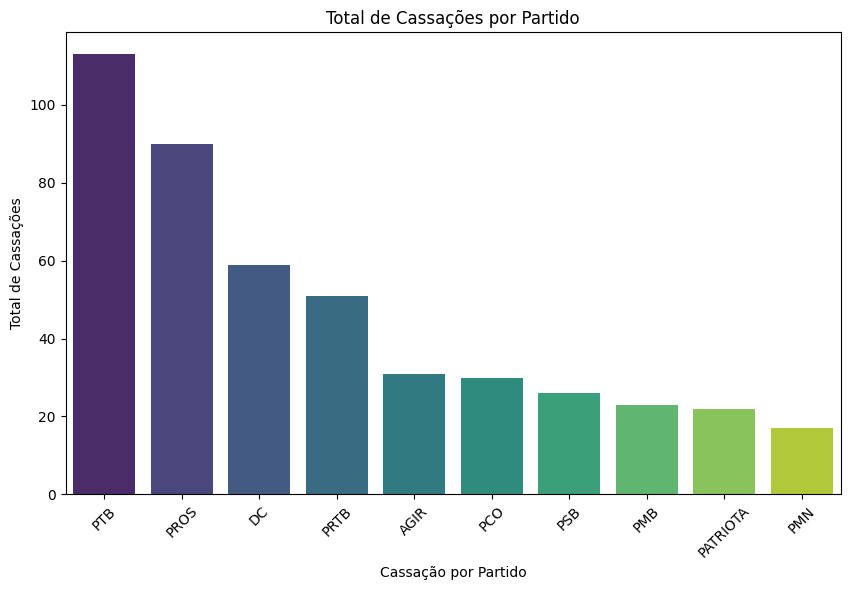

In [16]:
# Agrupar por partido e contar o número de cassações por partido
cassacoes_por_partido = pd.DataFrame(df.groupby('SG_PARTIDO').size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False))
# print(f"Cassação por partido: \n{cassacoes_por_partido}")

# Total de instâncias (número de partidos com cassações)
total_instancias = cassacoes_por_partido.shape[0]
print(f"Total de partidos com candidatos cassados: {total_instancias}")

# Cálculo da média e desvio padrão para o total de cassações por partido
media_cassacoes = cassacoes_por_partido['TOTAL'].mean()
desvio_padrao_cassacoes = cassacoes_por_partido['TOTAL'].std()

print(f"Média de cassações por partido: {media_cassacoes}")
print(f"Desvio padrão de cassações por partido: {desvio_padrao_cassacoes}")

# Esse esta dando errado!!!!!
# moda = cassacoes_por_partido['SG_PARTIDO'].mode().iloc[0]
# print(f"\nModa de cassações por estado: {moda}")

partido_mais_frequente = cassacoes_por_partido['SG_PARTIDO'].value_counts().idxmax()
print(f"Partido mais frequente: {partido_mais_frequente}")

# 1. Cálculo da Variância
# A variância da coluna 'cassacoes'
variancia = cassacoes_por_partido['TOTAL'].var(ddof=1)  # ddof=1 para amostra
print(f"\nVariância: {variancia}")

# 2. Cálculo da Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo
amplitude = cassacoes_por_partido['TOTAL'].max() - cassacoes_por_partido['TOTAL'].min()
print(f"Amplitude: {amplitude}")

display(cassacoes_por_partido.describe().round(8))




top_10_cassacoes_por_partido = cassacoes_por_partido.head(10)

# Plotar o gráfico de barras usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='SG_PARTIDO', y='TOTAL', data=top_10_cassacoes_por_partido, palette='viridis')
plt.xlabel('Cassação por Partido')
plt.ylabel('Total de Cassações')
plt.title('Total de Cassações por Partido')
plt.xticks(rotation=45)
plt.show()

# Perfil mais comum entre candidatos cassados

Total de motivos de cassação distintos: 34
Média de ocorrências por motivo de cassação: 18.352941176470587
Desvio padrão de ocorrências por motivo de cassação: 28.163895168945366
Moda por Gênero: MASCULINO
Moda por Grau de Instrução: SUPERIOR COMPLETO
Moda por Cargo: DEPUTADO ESTADUAL

Variância: 793.2049910873442
Amplitude: 122


,TOTAL
count,34.000000
mean,18.352941
std,28.163895
min,1.000000
25%,1.250000
50%,5.500000
75%,22.750000
max,123.000000


/tmp/ipykernel_514939/1146749688.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cassacoes_por_perfil, x='TOTAL', y='DS_CARGO', hue='DS_GENERO', ci=None)


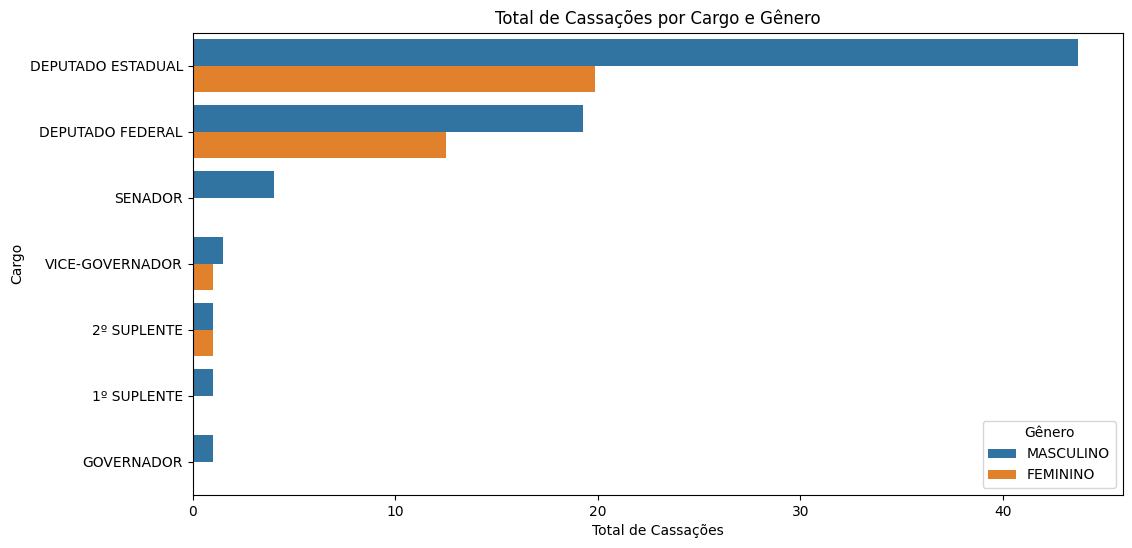

/tmp/ipykernel_514939/1146749688.py:58: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cassacoes_por_perfil, x='TOTAL', y='DS_CARGO', hue='DS_GRAU_INSTRUCAO', ci=None)


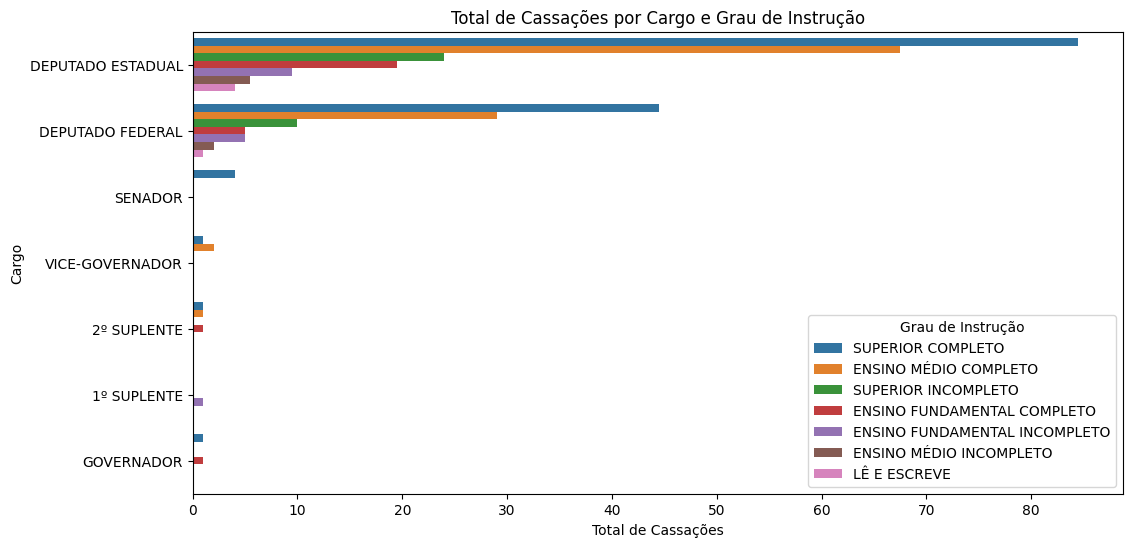

In [17]:
cassacoes_por_perfil = pd.DataFrame(df.groupby(['DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_CARGO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False))
# print(f"Cassação por perfil: \n{cassacoes_por_perfil}")

# Total de instâncias (número de motivos únicos de cassação)
total_instancias = cassacoes_por_perfil.shape[0]
print(f"Total de motivos de cassação distintos: {total_instancias}")

# Cálculo da média e desvio padrão para o total de ocorrências por motivo de cassação
media_ocorrencias = cassacoes_por_perfil['TOTAL'].mean()
desvio_padrao_ocorrencias = cassacoes_por_perfil['TOTAL'].std()

print(f"Média de ocorrências por motivo de cassação: {media_ocorrencias}")
print(f"Desvio padrão de ocorrências por motivo de cassação: {desvio_padrao_ocorrencias}")

# Calculando a moda por gênero
moda_genero = cassacoes_por_perfil['DS_GENERO'].value_counts().idxmax()
print(f"Moda por Gênero: {moda_genero}")

# Calculando a moda por grau de instrução
moda_grau_instrucao = cassacoes_por_perfil['DS_GRAU_INSTRUCAO'].value_counts().idxmax()
print(f"Moda por Grau de Instrução: {moda_grau_instrucao}")

# Calculando a moda por cargo
moda_cargo = cassacoes_por_perfil['DS_CARGO'].value_counts().idxmax()
print(f"Moda por Cargo: {moda_cargo}")

# 1. Cálculo da Variância
# A variância da coluna 'cassacoes'
variancia = cassacoes_por_perfil['TOTAL'].var(ddof=1)  # ddof=1 para amostra
print(f"\nVariância: {variancia}")

# 2. Cálculo da Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo
amplitude = cassacoes_por_perfil['TOTAL'].max() - cassacoes_por_perfil['TOTAL'].min()
print(f"Amplitude: {amplitude}")

display(cassacoes_por_perfil.describe().round(8))


# Criando um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=cassacoes_por_perfil, x='TOTAL', y='DS_CARGO', hue='DS_GENERO', ci=None)

# Adicionando título e rótulos
plt.title('Total de Cassações por Cargo e Gênero')
plt.xlabel('Total de Cassações')
plt.ylabel('Cargo')

# Mostrando a legenda
plt.legend(title='Gênero')

# Exibindo o gráfico
plt.show()


# Criando um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=cassacoes_por_perfil, x='TOTAL', y='DS_CARGO', hue='DS_GRAU_INSTRUCAO', ci=None)

# Adicionando título e rótulos
plt.title('Total de Cassações por Cargo e Grau de Instrução')
plt.xlabel('Total de Cassações')
plt.ylabel('Cargo')

# Mostrando a legenda
plt.legend(title='Grau de Instrução')

# Exibindo o gráfico
plt.show()


# Distribuição de Motivos de Cassação

Motivos de cassação: 
                                           DS_MOTIVO  TOTAL
2                 Ausência de requisito de registro     386
1                            Abuso de poder político    147
3                             Ficha limpa (LC 64/90)     71
4  Indeferimento de partido, federação ou coligação.     19
0                          Abuso de poder (LC 64/90)      1
Total de motivos de cassação distintos: 5
Média de ocorrências por motivo de cassação: 124.8
Desvio padrão de ocorrências por motivo de cassação: 156.63077603076604

Moda de cassações por estado: Ausência de requisito de registro 

Variância: 24533.199999999997
Amplitude: 385


,TOTAL
count,5.000000
mean,124.800000
std,156.630776
min,1.000000
25%,19.000000
50%,71.000000
75%,147.000000
max,386.000000


/tmp/ipykernel_514939/3422716830.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DS_MOTIVO', y='TOTAL', data=cassacoes_por_motivo, palette='viridis')


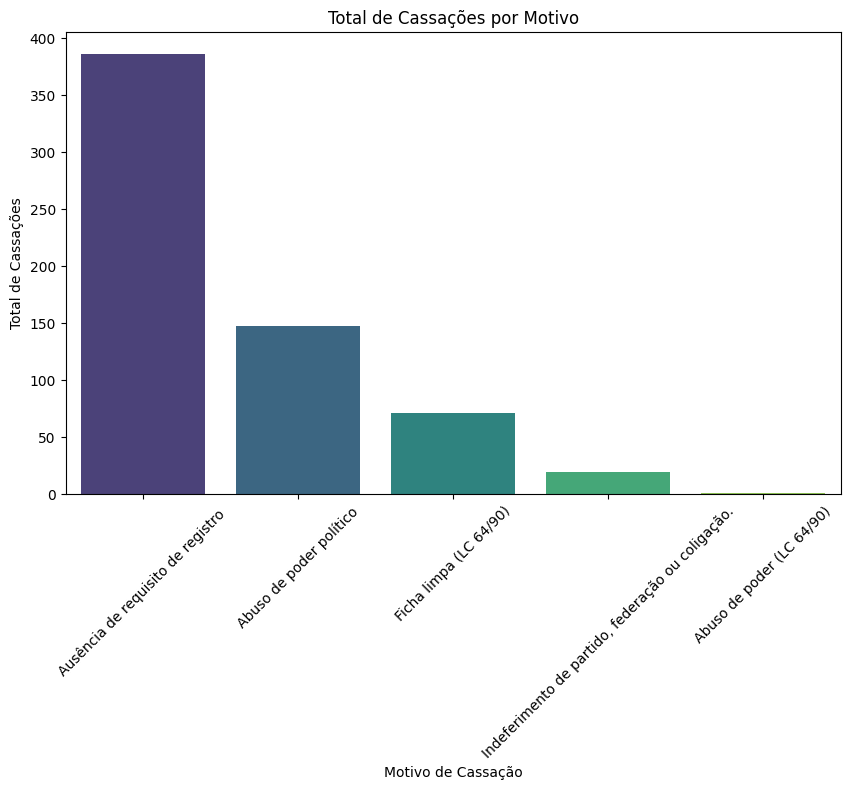

In [18]:
# Agrupar por motivo de cassação e contar o número de ocorrências de cada motivo
cassacoes_por_motivo = pd.DataFrame(df.groupby('DS_MOTIVO').size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False))
print(f"Motivos de cassação: \n{cassacoes_por_motivo}")

# Total de instâncias (número de motivos únicos de cassação)
total_instancias = cassacoes_por_motivo.shape[0]
print(f"Total de motivos de cassação distintos: {total_instancias}")

# Cálculo da média e desvio padrão para o total de ocorrências por motivo de cassação
media_ocorrencias = cassacoes_por_motivo['TOTAL'].mean()
desvio_padrao_ocorrencias = cassacoes_por_motivo['TOTAL'].std()

print(f"Média de ocorrências por motivo de cassação: {media_ocorrencias}")
print(f"Desvio padrão de ocorrências por motivo de cassação: {desvio_padrao_ocorrencias}")

moda = cassacoes_por_motivo['DS_MOTIVO'].value_counts().idxmax()
print(f"\nModa de cassações por estado: {moda}")
# 1. Cálculo da Variância
# A variância da coluna 'cassacoes'
variancia = cassacoes_por_motivo['TOTAL'].var(ddof=1)  # ddof=1 para amostra
print(f"\nVariância: {variancia}")

# 2. Cálculo da Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo
amplitude = cassacoes_por_motivo['TOTAL'].max() - cassacoes_por_motivo['TOTAL'].min()
print(f"Amplitude: {amplitude}")

display(cassacoes_por_motivo.describe().round(8))


top_10_cassacoes_por_motivo = cassacoes_por_motivo.head(10)

# Plotar o gráfico de barras usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='DS_MOTIVO', y='TOTAL', data=cassacoes_por_motivo, palette='viridis')
plt.xlabel('Motivo de Cassação')
plt.ylabel('Total de Cassações')
plt.title('Total de Cassações por Motivo')
plt.xticks(rotation=45)
plt.show()

# Cassações por Turno Eleitoral

In [19]:
# Agrupar por turno eleitoral e contar o número de cassações por turno
cassacoes_por_turno = pd.DataFrame(df.groupby('DS_SIT_TOT_TURNO').size().reset_index(name='TOTAL'))
print(f"Cassação por turno eleitoral: \n{cassacoes_por_turno}")

# Total de instâncias (número de turnos com cassações registradas)
total_instancias = cassacoes_por_turno.shape[0]
print(f"Total de turnos com candidatos cassados: {total_instancias}")

# Cálculo da média e desvio padrão para o total de cassações por turno
media_cassacoes_turno = cassacoes_por_turno['TOTAL'].mean()
desvio_padrao_cassacoes_turno = cassacoes_por_turno['TOTAL'].std()

print(f"Média de cassações por turno: {media_cassacoes_turno}")
print(f"Desvio padrão de cassações por turno: {desvio_padrao_cassacoes_turno}")

moda = cassacoes_por_turno['DS_SIT_TOT_TURNO'].value_counts().idxmax()
print(f"\nModa de cassações por estado: {moda}")
# 1. Cálculo da Variância
# A variância da coluna 'cassacoes'
variancia = cassacoes_por_turno['TOTAL'].var(ddof=1)  # ddof=1 para amostra
print(f"\nVariância: {variancia}")

# 2. Cálculo da Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo
amplitude = cassacoes_por_turno['TOTAL'].max() - cassacoes_por_turno['TOTAL'].min()
print(f"Amplitude: {amplitude}")

display(cassacoes_por_turno.describe().round(8))

Cassação por turno eleitoral: 
  DS_SIT_TOT_TURNO  TOTAL
0           #NULO#    130
1       NÃO ELEITO    494
Total de turnos com candidatos cassados: 2
Média de cassações por turno: 312.0
Desvio padrão de cassações por turno: 257.3868683519033

Moda de cassações por estado: #NULO#

Variância: 66248.0
Amplitude: 364


,TOTAL
count,2.000000
mean,312.000000
std,257.386868
min,130.000000
25%,221.000000
50%,312.000000
75%,403.000000
max,494.000000


# Cassações por Ocupação Anterior

Cassação por ocupação anterior: 
                                          DS_OCUPACAO  TOTAL
57                                             OUTROS    150
34                                         EMPRESÁRIO    104
1                                            ADVOGADO     39
19                                        COMERCIANTE     32
7                APOSENTADO (EXCETO SERVIDOR PÚBLICO)     27
..                                                ...    ...
73  SECRETÁRIO,ESTENÓGRAFO,DATILÓGRAFO,RECEPCIONIS...      1
80                    TRABALHADOR DE CONSTRUÇÃO CIVIL      1
83                   TÉCNICO DE LABORATÓRIO E RAIOS X      1
84                                TÉCNICO DE MECÂNICA      1
85                             TÉCNICO EM EDIFICAÇÕES      1

[89 rows x 2 columns]
Total de ocupações com candidatos cassados: 89
Média de cassações por ocupação: 7.01123595505618
Desvio padrão de cassações por ocupação: 19.660467014488326

Moda de cassações por estado: OUTROS

Variância: 386.5

,TOTAL
count,89.000000
mean,7.011236
std,19.660467
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,150.000000


DS_OCUPACAO
OUTROS                                                                    1
EMPRESÁRIO                                                                1
ADVOGADO                                                                  1
COMERCIANTE                                                               1
APOSENTADO (EXCETO SERVIDOR PÚBLICO)                                      1
                                                                         ..
SECRETÁRIO,ESTENÓGRAFO,DATILÓGRAFO,RECEPCIONISTA,TELEFONISTA,TAQUÍGRAF    1
TRABALHADOR DE CONSTRUÇÃO CIVIL                                           1
TÉCNICO DE LABORATÓRIO E RAIOS X                                          1
TÉCNICO DE MECÂNICA                                                       1
TÉCNICO EM EDIFICAÇÕES                                                    1
Name: count, Length: 89, dtype: int64


/tmp/ipykernel_514939/2340397427.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DS_OCUPACAO', y='TOTAL', data=top_10_cassacoes_por_ocupacao, palette='viridis')


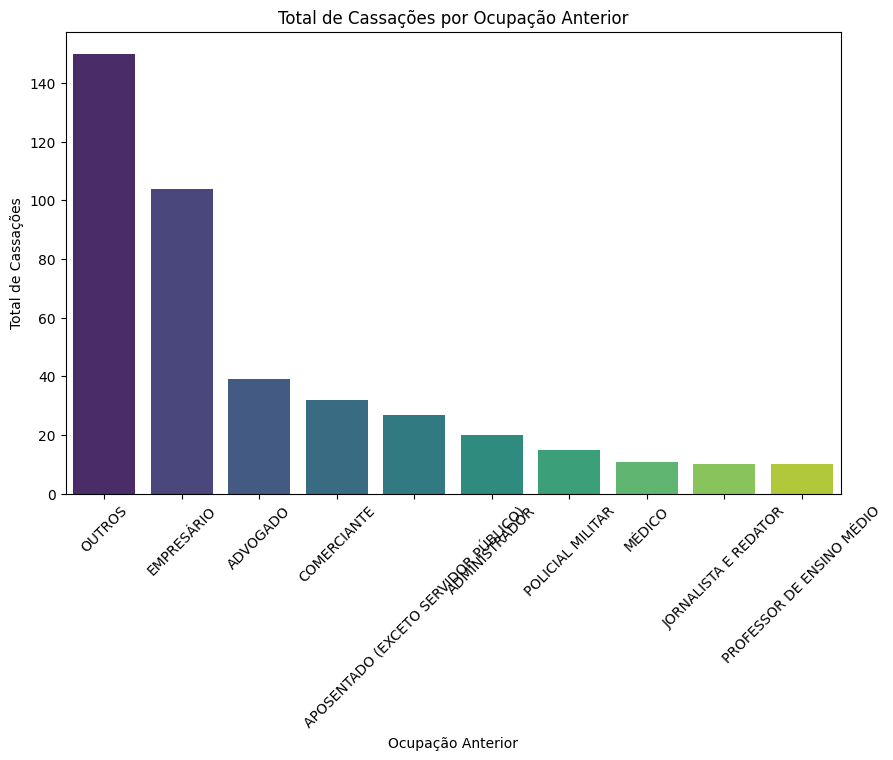

In [20]:
# Agrupar por ocupação anterior e contar o número de cassações por ocupação
cassacoes_por_ocupacao = pd.DataFrame(df.groupby('DS_OCUPACAO').size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False))
print(f"Cassação por ocupação anterior: \n{cassacoes_por_ocupacao}")

# Total de instâncias (número de ocupações com cassações registradas)
total_instancias = cassacoes_por_ocupacao.shape[0]
print(f"Total de ocupações com candidatos cassados: {total_instancias}")

# Cálculo da média e desvio padrão para o total de cassações por ocupação
media_cassacoes_ocupacao = cassacoes_por_ocupacao['TOTAL'].mean()
desvio_padrao_cassacoes_ocupacao = cassacoes_por_ocupacao['TOTAL'].std()

print(f"Média de cassações por ocupação: {media_cassacoes_ocupacao}")
print(f"Desvio padrão de cassações por ocupação: {desvio_padrao_cassacoes_ocupacao}")


moda = cassacoes_por_ocupacao['DS_OCUPACAO'].value_counts().idxmax()
print(f"\nModa de cassações por estado: {moda}")
# 1. Cálculo da Variância
# A variância da coluna 'cassacoes'
variancia = cassacoes_por_ocupacao['TOTAL'].var(ddof=1)  # ddof=1 para amostra
print(f"\nVariância: {variancia}")

# 2. Cálculo da Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo
amplitude = cassacoes_por_ocupacao['TOTAL'].max() - cassacoes_por_ocupacao['TOTAL'].min()
print(f"Amplitude: {amplitude}")

display(cassacoes_por_ocupacao.describe().round(8))

print(cassacoes_por_ocupacao['DS_OCUPACAO'].value_counts())

# cria um gráfico de barras com a frequência de cada classe
# sns.countplot(x="ocupacao", data=cassacoes_por_ocupacao)

top_10_cassacoes_por_ocupacao = cassacoes_por_ocupacao.head(10)

# Plotar o gráfico de barras usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='DS_OCUPACAO', y='TOTAL', data=top_10_cassacoes_por_ocupacao, palette='viridis')
plt.xlabel('Ocupação Anterior')
plt.ylabel('Total de Cassações')
plt.title('Total de Cassações por Ocupação Anterior')
plt.xticks(rotation=45)
plt.show()


# Estatísticas

Agora que os dados estão normalizados, vamos analisar as informações estatísticas novamente.

In [21]:
from sklearn.preprocessing import StandardScaler

# Renomeando as colunas antes de concatenar
cassacoes_por_estado = cassacoes_por_estado.rename(columns={'TOTAL': 'TOTAL_ESTADO'})
cassacoes_por_motivo = cassacoes_por_motivo.rename(columns={'TOTAL': 'TOTAL_MOTIVO'})
cassacoes_por_partido = cassacoes_por_partido.rename(columns={'TOTAL': 'TOTAL_PARTIDO'})
cassacoes_por_perfil = cassacoes_por_perfil.rename(columns={'TOTAL': 'TOTAL_PERFIL'})
cassacoes_por_turno = cassacoes_por_turno.rename(columns={'TOTAL': 'TOTAL_TURNO'})
cassacoes_por_ocupacao = cassacoes_por_ocupacao.rename(columns={'TOTAL': 'TOTAL_OCUPACAO'})

# Concatenando os DataFrames com os novos nomes de coluna
resultados_combinados = pd.concat([cassacoes_por_estado['TOTAL_ESTADO'], cassacoes_por_motivo['TOTAL_MOTIVO'], cassacoes_por_partido['TOTAL_PARTIDO'], cassacoes_por_perfil['TOTAL_PERFIL'], cassacoes_por_turno['TOTAL_TURNO'], cassacoes_por_ocupacao['TOTAL_OCUPACAO']], axis=1)
print("Resultados combinados:")
display(resultados_combinados.describe().round(8))

# Selecionar apenas os atributos numéricos
atributos_numericos = resultados_combinados.select_dtypes(include=['float64', 'int64']).columns

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar a normalização z-score aos atributos numéricos
resultados_combinados[atributos_numericos] = scaler.fit_transform(resultados_combinados[atributos_numericos])

print("Resultados combinados normalizados:")
display(resultados_combinados.describe().round(8))



Resultados combinados:


,TOTAL_ESTADO,TOTAL_MOTIVO,TOTAL_PARTIDO,TOTAL_PERFIL,TOTAL_TURNO,TOTAL_OCUPACAO
count,4.000000,5.000000,29.000000,34.000000,2.000000,89.000000
mean,156.000000,124.800000,21.517241,18.352941,312.000000,7.011236
std,148.680866,156.630776,26.191084,28.163895,257.386868,19.660467
min,30.000000,1.000000,1.000000,1.000000,130.000000,1.000000
25%,69.750000,19.000000,7.000000,1.250000,221.000000,1.000000
50%,113.000000,71.000000,12.000000,5.500000,312.000000,2.000000
75%,199.250000,147.000000,23.000000,22.750000,403.000000,5.000000
max,368.000000,386.000000,113.000000,123.000000,494.000000,150.000000


Resultados combinados normalizados:


,TOTAL_ESTADO,TOTAL_MOTIVO,TOTAL_PARTIDO,TOTAL_PERFIL,TOTAL_TURNO,TOTAL_OCUPACAO
count,4.000000,5.000000,29.000000,34.000000,2.000000,89.000000
mean,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000
std,1.154701,1.118034,1.017700,1.015038,1.414214,1.005666
min,-0.978554,-0.883687,-0.797233,-0.625407,-1.000000,-0.307485
25%,-0.669844,-0.755203,-0.564093,-0.616397,-0.500000,-0.307485
50%,-0.333951,-0.384026,-0.369809,-0.463225,0.000000,-0.256333
75%,0.335893,0.158464,0.057615,0.158472,0.500000,-0.102878
max,1.646456,1.864451,3.554723,3.771523,1.000000,7.314114


Podemos ver acima que a média (*mean*) ficou igual a 0 e o desvio padrão (*std*) igual a 1. 

# Detecção de *outliers*

Outro passo importante na análise e tratamento dos dados é a detecção de *outliers* (*i.e.*, dados gerados por leituras incorretas, erros de digitação, etc). 

Uma das maneiras mais simples de verificar se os dados contém *outliers* é criar um gráfico box plot de cada atributo. Para isso, podemos usar a função `boxplot` da biblioteca `Pandas`.

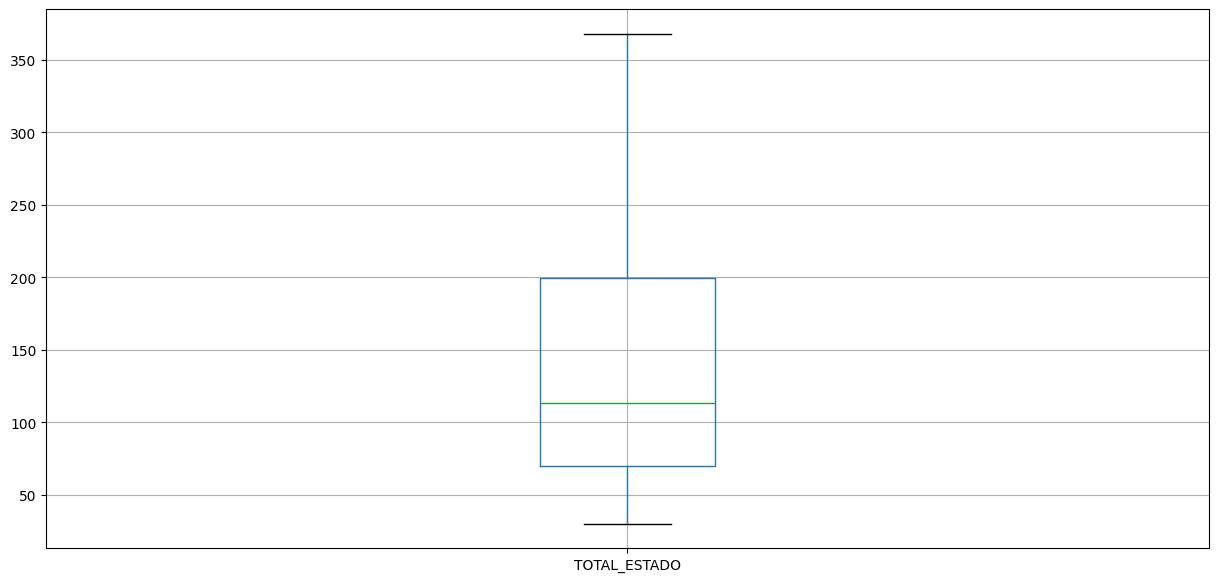

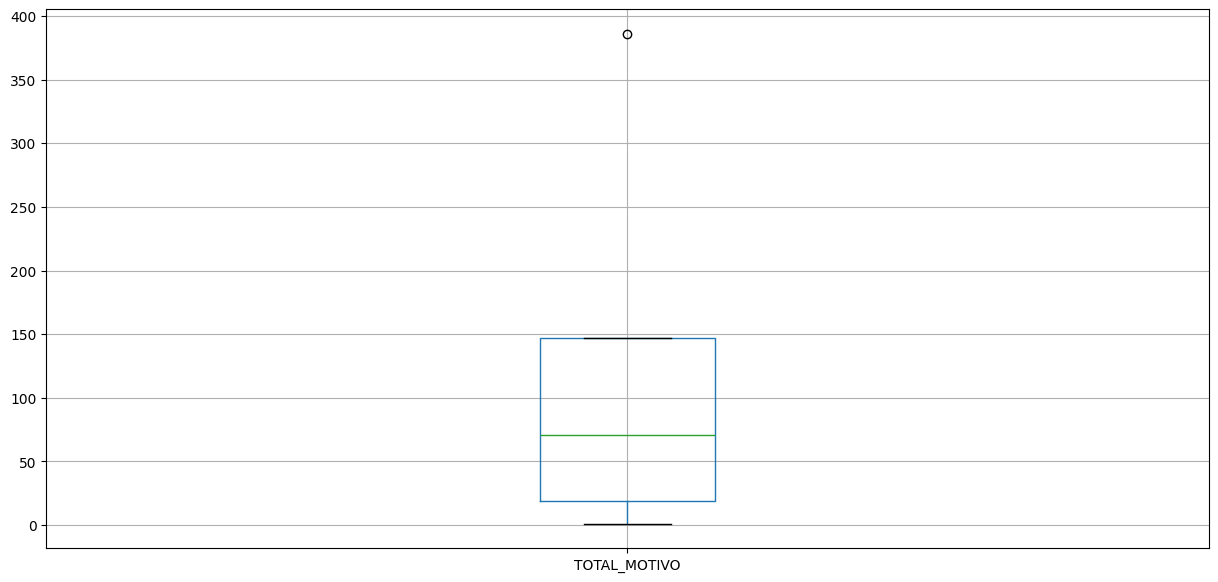

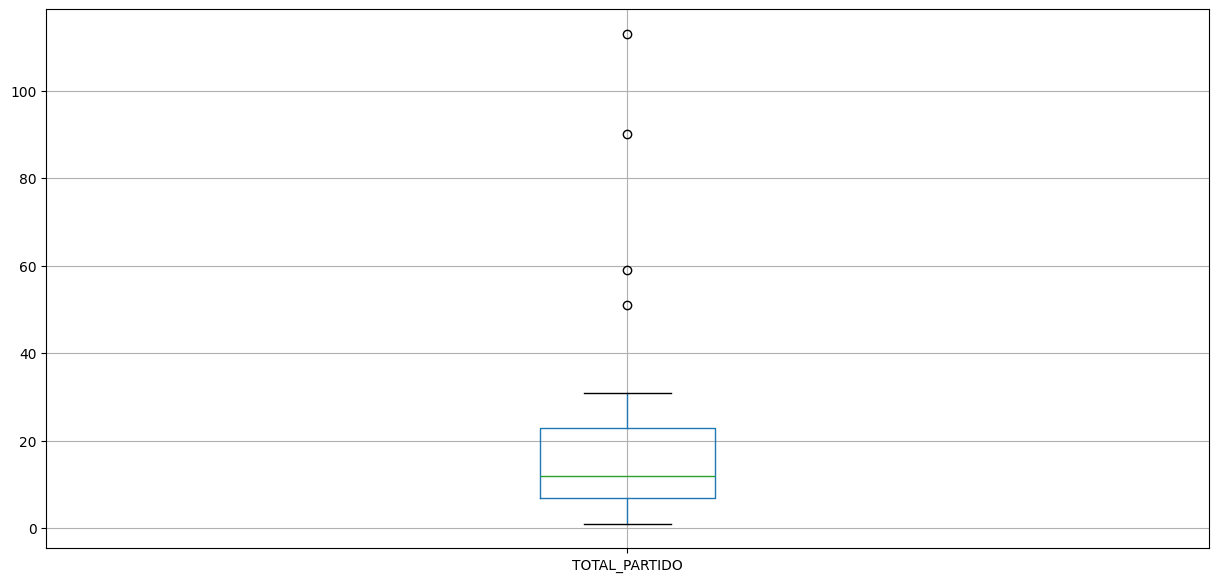

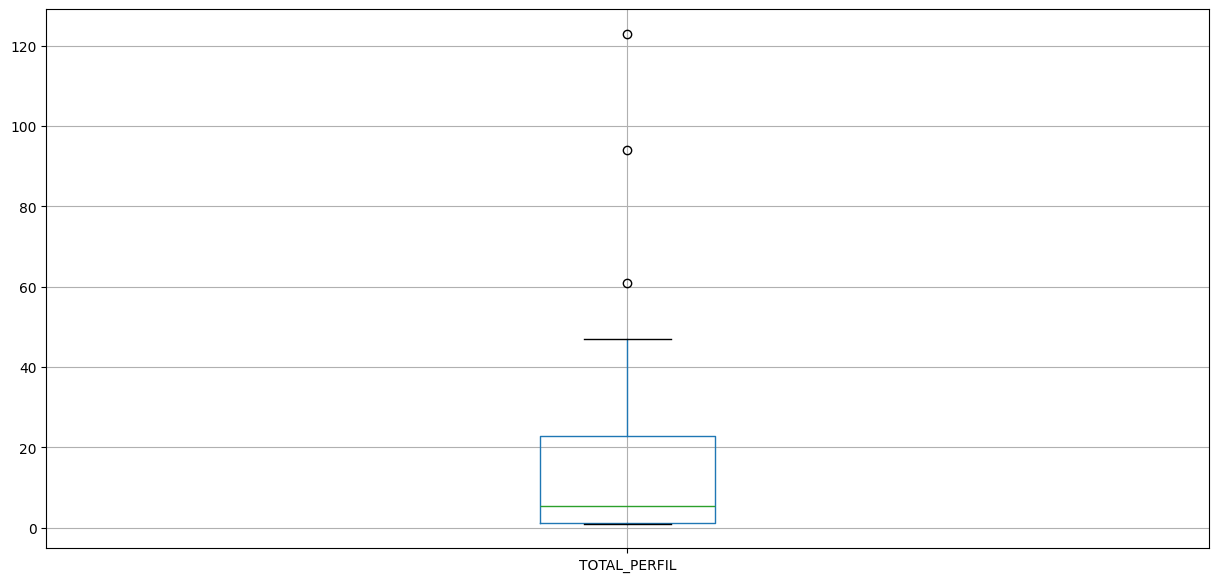

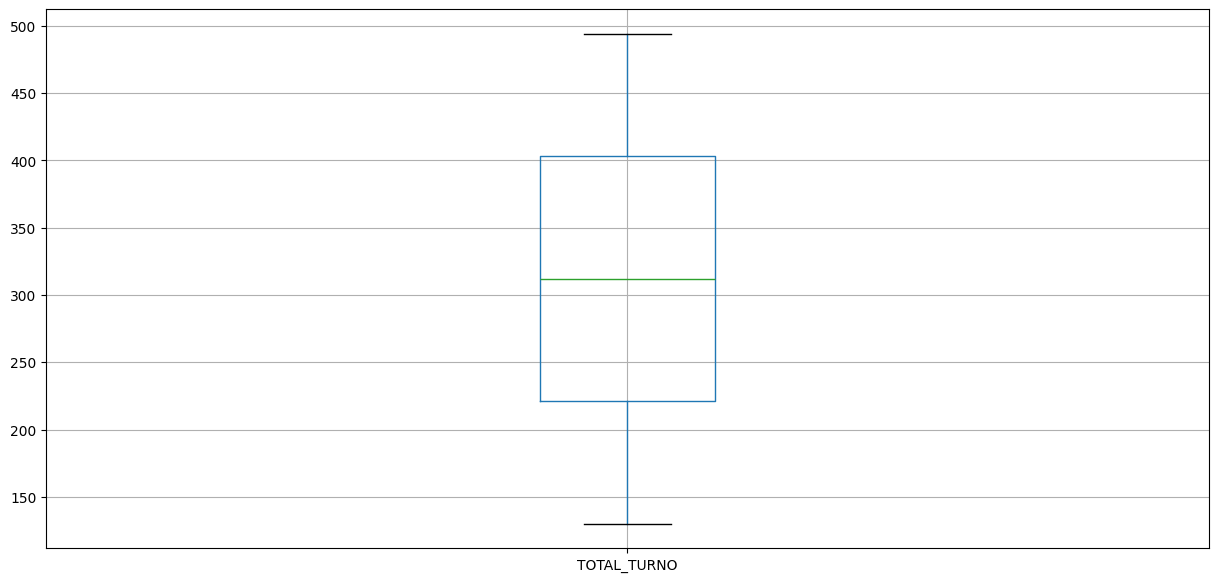

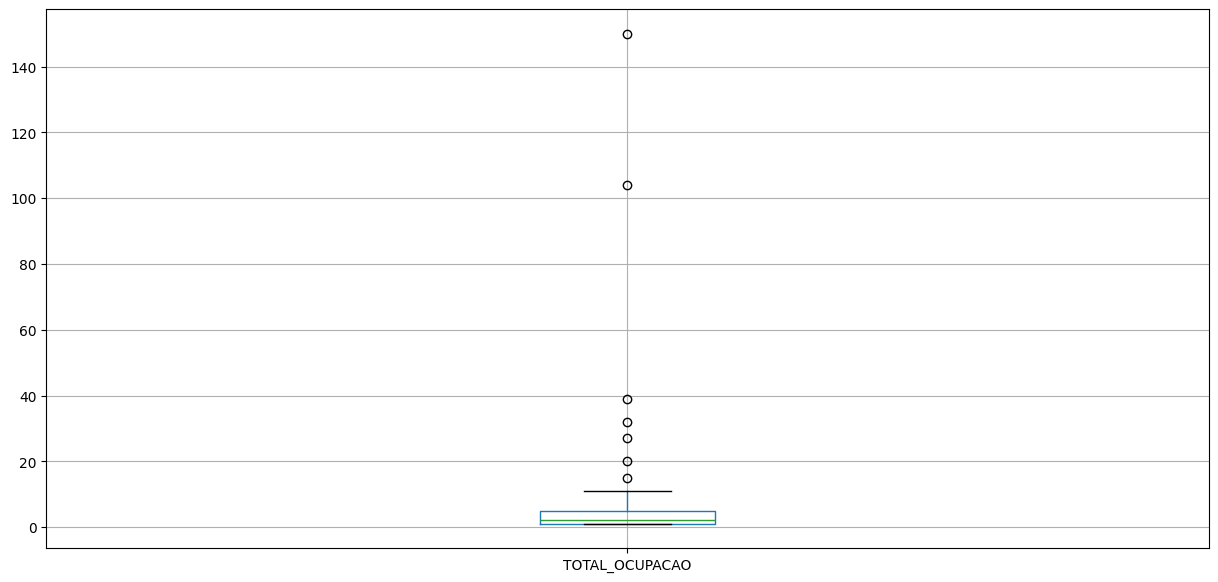

In [24]:
# gera um bloxplot para cada atributo
cassacoes_por_estado.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_motivo.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_partido.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_perfil.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_turno.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_ocupacao.boxplot(figsize=(15,7))
plt.show()



O box plot está indicando que os atributos `comprimento_sepala` e `largura_sepala` possuem *outliers*, o que pode prejudicar o desempenho de vários métodos de aprendizado de máquina, pois provavelmente tratam-se de amostras com valores de atributos incorretos. 

Outra forma de analisar se a base de dados contém *outliers* é usar gráficos de dispersão. Podemos plotar gráficos de dispersão a partir dos _dataframes_ utilizando a biblioteca `Seaborn`. Juntamente com essa biblioteca, também é recomendável importar a biblioteca `Matplotlib` para personalizar os gráficos.

In [27]:
# # matriz de gráficos scatter 
# sns.pairplot(cassacoes_por_estado, hue='SG_UF', height=3.5)
# sns.pairplot(cassacoes_por_perfil, hue='DS_GRAU_INSTRUCAO', height=3.5)
# sns.pairplot(cassacoes_por_ocupacao, hue='DS_OCUPACAO', height=3.5)
# sns.pairplot(cassacoes_por_motivo, hue='DS_MOTIVO', height=3.5)
# sns.pairplot(cassacoes_por_partido, hue='SG_PARTIDO', height=3.5)
# sns.pairplot(cassacoes_por_turno, hue='DS_SIT_TOT_TURNO', height=3.5)

# # mostra o gráfico usando a função show() da matplotlib
# plt.show()

Observando os gráficos de dispersão, é fácil perceber que existem duas amostras da classe *Iris-virginica* que estão deslocadas no espaço em relação às demais amostras.

Pelos gráficos, os *outliers* parecem ser mais visíveis na combinação dos atributos `comprimento_sepala` e `largura_sepala`. Então, vamos usar a função `lmplot` da biblioteca `Seaborn`para visualizar a combinação desses dois atributos.

In [ ]:
# # define o scatter plot
# sns.lmplot(x='comprimento_sepala', y='largura_sepala', data=df_dataset, 
#            fit_reg=False,  
#            hue='classe')

# # cria um título para o gráfico
# plt.title('Comprimento vs largura da sepala')

# # mostra o gráfico
# plt.show()

Pelos gráficos vistos até o momento, fica claro que um dos *outliers* possui um alto valor no atributo `largura_sepala`. Já o segundo outlier contém um alto valor no atributo `comprimento_sepala`. 

A bilioteca `Seaborn` permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. No exemplo abaixo, criaremos boxplots para cada atributo agrupados pela classe.

In [28]:
# # for atributo in df_dataset.columns[:-1]:
#     # define a dimensão do gráfico
# print(cassacoes_por_partido.columns)
# plt.figure(figsize=(8,8))

# # cria o boxplot
# sns.boxplot(x="SG_PARTIDO", y='TOTAL', data=cassacoes_por_partido, whis=1.5)

# # mostra o gráfico
# plt.show()

Os box plots dos atributos mostraram outros *outliers* que não haviam aparecido no primeiro box plot. Portanto, esses novos valores são considerados *outliers* se analisarmos as classes individualmente, mas não são considerados *outliers* se analisarmos a base de dados de forma geral. 

Outro tipo de gráfico que ajuda a detectar *outliers* é o histograma. Portanto, vamos usá-lo para analisar cada atributo.

In [29]:
# for atributo in df_dataset.columns[:-1]:
    
#     # cria o histograma
#     n, bins, patches = plt.hist(df_dataset[atributo].values,bins=10, color='red', edgecolor='black', linewidth=0.9)

#     # cria um título para o gráfico
#     plt.title(atributo)

#     # mostra o gráfico
#     plt.show()

Nos histogramas, os *outliers* mais evidentes estão nos atributos `comprimento_sepala` e `largura_sepala`.

Uma das maneiras mais simples de tratar *outliers* é remover aqueles valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$, onde $Q1$ é o primeiro quartil, $Q3$ é o terceiro quartil e $IQR$ é o intervalo interquartil. O IQR pode ser calculado pela seguinte equação: $IQR = Q3-Q1$. 

### **Exercício**

7. Remova as instâncias consideradas outliers do dataset. Vamos considerar como outliers valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$. Utilize como base o IQR de cada atributo em relação a todos os valores na base de dados, em vez do IQR individual de cada classe.

In [33]:
#Remova outliers aqui Motivo
atributos_numericos = cassacoes_por_motivo.select_dtypes(include=['float64', 'int64']).columns

Q1 = cassacoes_por_motivo[atributos_numericos].quantile(0.25)
Q3 = cassacoes_por_motivo[atributos_numericos].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_dataset = cassacoes_por_motivo[~((cassacoes_por_motivo[atributos_numericos] < limite_inferior) | (cassacoes_por_motivo[atributos_numericos] > limite_superior)).any(axis=1)]


#Remova outliers aqui cassacoes_por_estado
atributos_numericos = cassacoes_por_estado.select_dtypes(include=['float64', 'int64']).columns

Q1 = cassacoes_por_estado[atributos_numericos].quantile(0.25)
Q3 = cassacoes_por_estado[atributos_numericos].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_dataset = cassacoes_por_estado[~((cassacoes_por_estado[atributos_numericos] < limite_inferior) | (cassacoes_por_estado[atributos_numericos] > limite_superior)).any(axis=1)]

#Remova outliers aqui cassacoes_por_partido
atributos_numericos = cassacoes_por_partido.select_dtypes(include=['float64', 'int64']).columns

Q1 = cassacoes_por_partido[atributos_numericos].quantile(0.25)
Q3 = cassacoes_por_partido[atributos_numericos].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_dataset = cassacoes_por_partido[~((cassacoes_por_partido[atributos_numericos] < limite_inferior) | (cassacoes_por_partido[atributos_numericos] > limite_superior)).any(axis=1)]


#Remova outliers aqui cassacoes_por_partido
atributos_numericos = cassacoes_por_perfil.select_dtypes(include=['float64', 'int64']).columns

Q1 = cassacoes_por_perfil[atributos_numericos].quantile(0.25)
Q3 = cassacoes_por_perfil[atributos_numericos].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_dataset = cassacoes_por_perfil[~((cassacoes_por_perfil[atributos_numericos] < limite_inferior) | (cassacoes_por_perfil[atributos_numericos] > limite_superior)).any(axis=1)]



#Remova outliers aqui cassacoes_por_partido
atributos_numericos = cassacoes_por_ocupacao.select_dtypes(include=['float64', 'int64']).columns

Q1 = cassacoes_por_ocupacao[atributos_numericos].quantile(0.25)
Q3 = cassacoes_por_ocupacao[atributos_numericos].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_dataset = cassacoes_por_ocupacao[~((cassacoes_por_ocupacao[atributos_numericos] < limite_inferior) | (cassacoes_por_ocupacao[atributos_numericos] > limite_superior)).any(axis=1)]




Depois da remoção, se analizarmos o box plot e os gráficos de dispersão deveremos observar que não há mais nenhum *outlier* na base de dados. 

Abaixo vamos plotar os gráficos novamente.

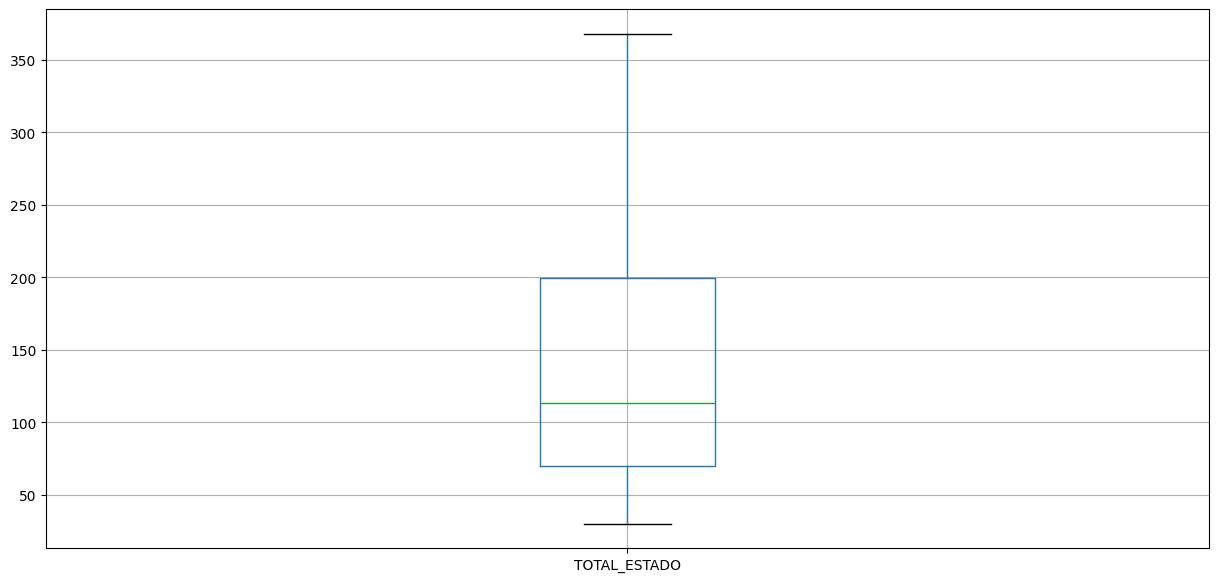

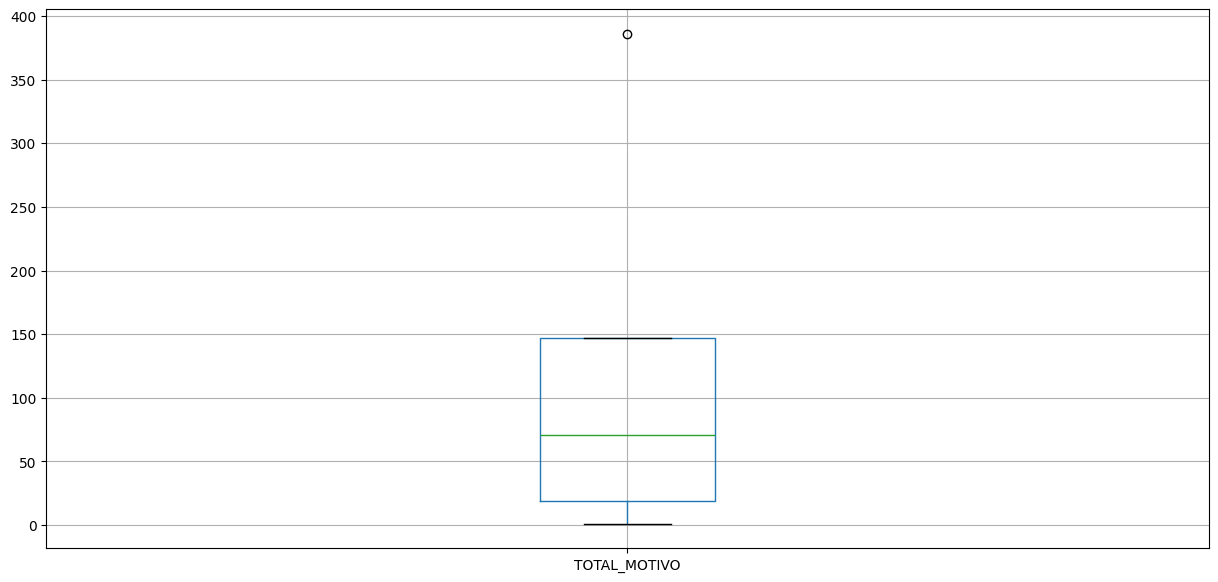

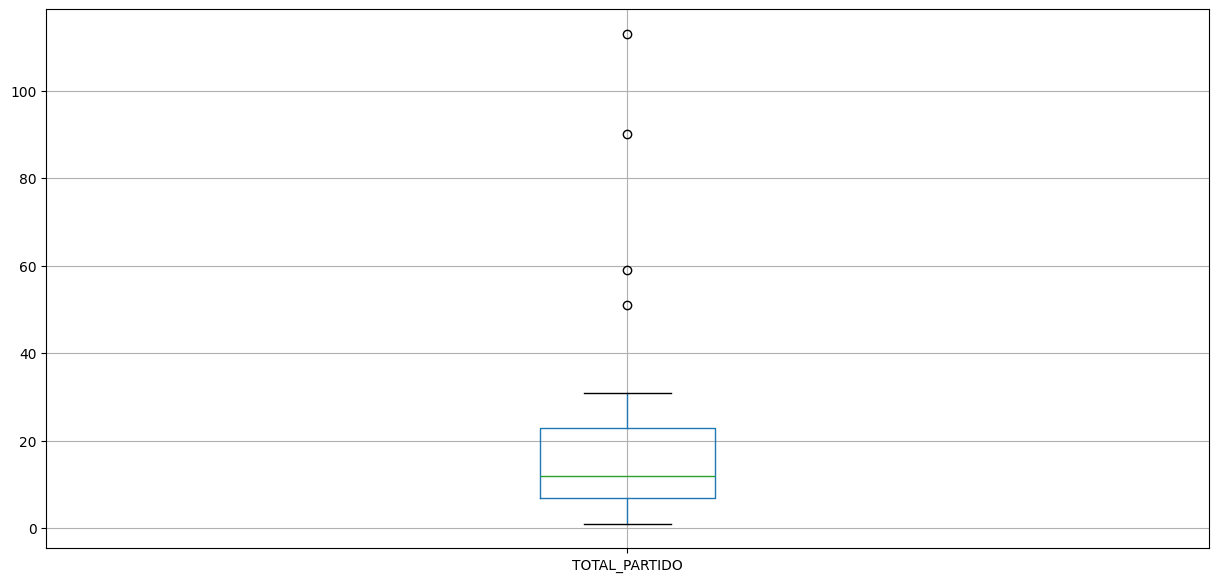

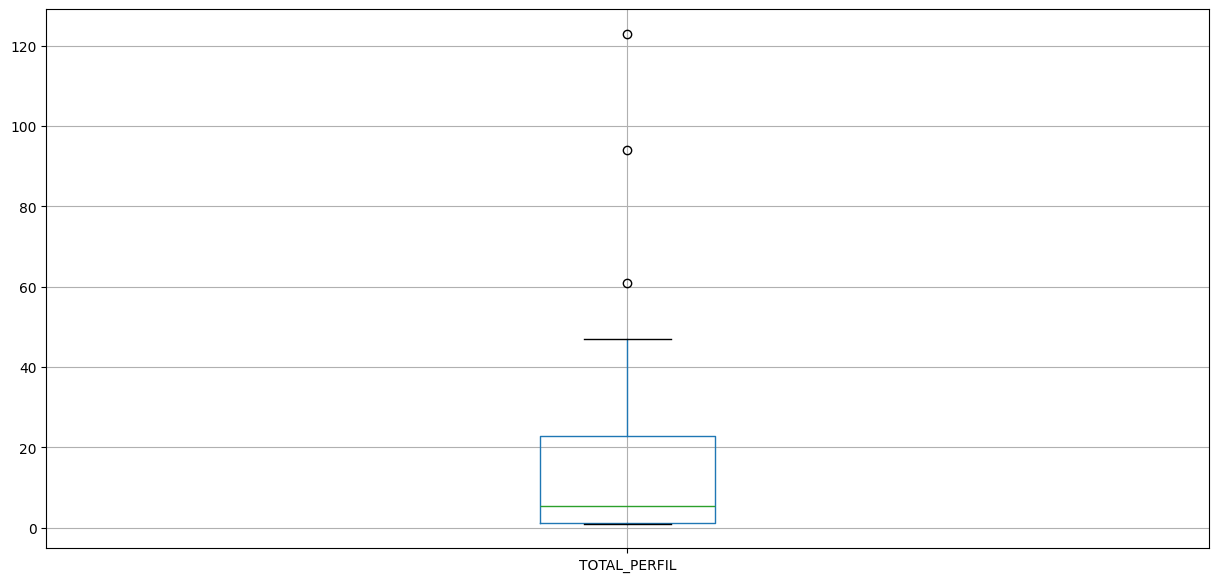

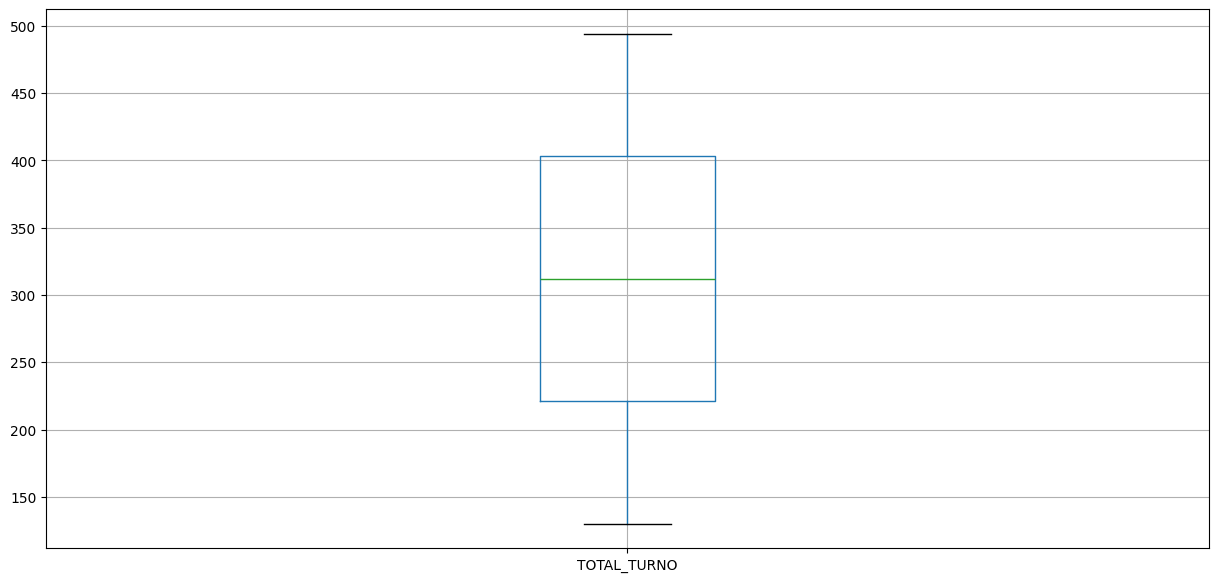

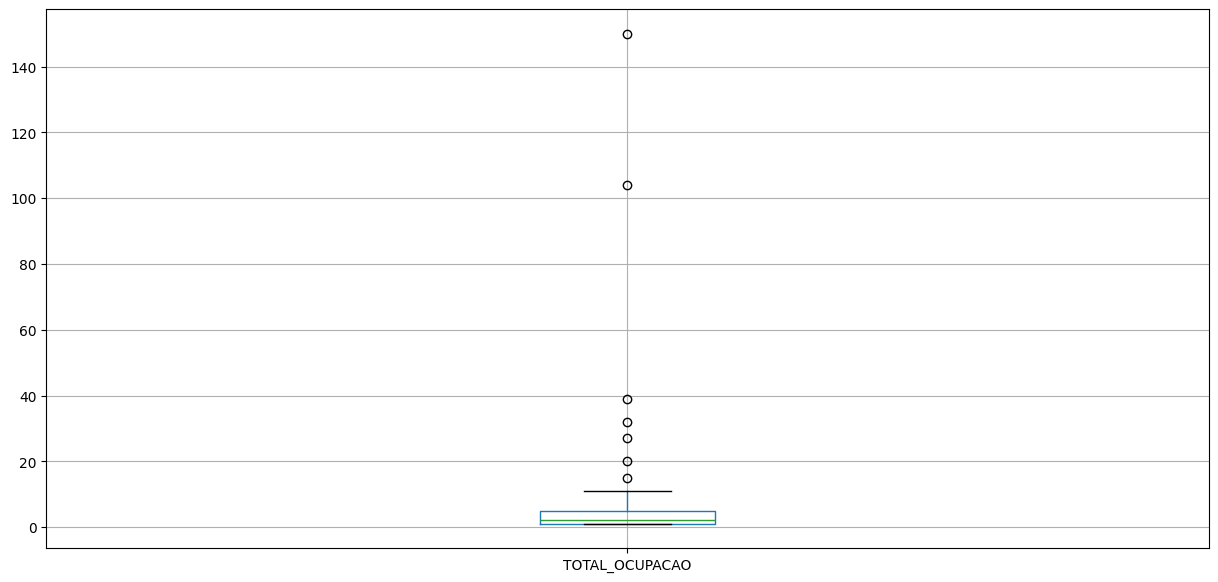

In [36]:
# gera um bloxplot para cada atributo
cassacoes_por_estado.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_motivo.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_partido.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_perfil.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_turno.boxplot(figsize=(15,7))
plt.show()

cassacoes_por_ocupacao.boxplot(figsize=(15,7))
plt.show()



Com os novos gráficos de dispersão, também é possível perceber que a classe *Iris-setosa* é mais fácil de identificar, pois está mais separada no espaço de atributos. Por outro lado, em várias combinações de atributos, as classes *Iris-versicolor* e *Iris-virginica* se misturam.

**IMPORTANTE:** antes de realizar a remoção de *outliers*, é mandatório analisar cuidadosamente as características das amostras antes de removê-las. Em alguns casos, remover os *outliers* pode ser prejudicial. Além disso, algumas tarefas de aprendizado de máquina são voltadas para a detecção de *outliers* e, portanto, esses dados não podem ser removidos. Adicionalmente, se a base de dados for desbalanceada, a remoção dos *outliers* com base nas estatísticas de toda a base, pode acabar removendo amostras da classe minoritária (aquela que possui menos amostras). Ainda, alguns métodos de classificação, tais como métodos baseados em *ensemble* e métodos baseados em árvores, costumam ser robustos a *outliers*. Diante disso, em alguns problemas, é recomendável remover apenas aqueles *outliers* que são claramente erros de leitura/digitação, isto é, valores que estão fora dos limites aceitáveis para o que é esperado para um determinado atributo (por exemplo, uma pessoa com 500 anos ou um bebê com 300 kg). 


## Distribuição das classes

Outro passo importante na análise de dados é verificar a distribuição das classes. Para isso, é possível criar um gráfico de barra indicando quantas amostras de cada classe há na base de dados.

classe
Iris-versicolor    50
Iris-setosa        47
Iris-virginica     47
Name: count, dtype: int64


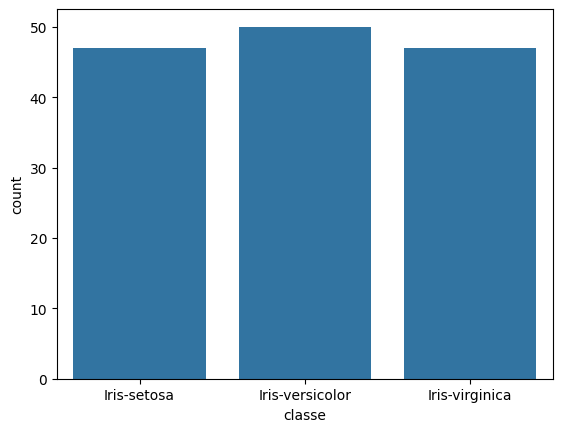

In [ ]:
print( df_dataset['classe'].value_counts())

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="classe", data=df_dataset)

# mostra o gráfico
plt.show()

Conforme podemos ver acima, as 3 classes possuem aproximadamente 50 instâncias cada uma, ou seja, temos um dataset balanceado. Se o número de exemplos em alguma das classes fosse muito superior às demais, teríamos que usar alguma técnica de balanceamento de classes, pois o modelo gerado pela maioira dos métodos de aprendizado supervisionado costuma ser tendencioso para as classes com maior número de amostras. 

## Correlação entre os atributos

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Podemos fazer isso usando as funções nativas de correlação e covariância da bilioteca `Pandas`.

In [ ]:
# matriz de covariancia
df_covariance = df_dataset[["comprimento_sepala","comprimento_petala",
                            "largura_sepala", "largura_petala"]].cov()

# matriz de correlação
df_correlation = df_dataset[["comprimento_sepala","comprimento_petala",
                            "largura_sepala", "largura_petala"]].corr()

print('Matriz de covariância: ')
display(df_covariance)

print('\n\nMatriz de correlação: ')
display(df_correlation)

Matriz de covariância: 


,comprimento_sepala,comprimento_petala,largura_sepala,largura_petala
comprimento_sepala,0.308917,1.546725e-04,-0.016296,0.448538
comprimento_petala,0.000155,1.027346e-07,-0.000035,0.000307
largura_sepala,-0.016296,-3.531331e-05,0.066183,-0.093593
largura_petala,0.448538,3.065217e-04,-0.093593,0.988270




Matriz de correlação: 


,comprimento_sepala,comprimento_petala,largura_sepala,largura_petala
comprimento_sepala,1.000000,0.868228,-0.113970,0.811785
comprimento_petala,0.868228,1.000000,-0.428259,0.961978
largura_sepala,-0.113970,-0.428259,1.000000,-0.365960
largura_petala,0.811785,0.961978,-0.365960,1.000000


Podemos ver que os atributos `comprimento_petala` e `largura_petala` possuem alta covariância e alta correlação. Se o problema que estamos analisando tivesse muitos atributos, poderíamos pensar na possibilidade de combinar esses dois atributos. Se a correlação entre dois atributos for igual a 1 ou -1, significa que eles são redundantes e um deles poderia ser eliminado.

É importante notar que a alta correlação entre dois atributos não significa que um deles influencia no valor do outro. Veja alguns exemplos que mostram isso em <http://www.tylervigen.com/spurious-correlations>.

---
## Referências

[1] R. A. Fisher. The use of multiple measurements in taxonomic problems. Annual Eugenics, 7, Part II, 179-188 (1936). DOI: [10.1111/j.1469-1809.1936.tb02137.x](http://dx.doi.org/10.1111/j.1469-1809.1936.tb02137.x).

[2] Faceli, Katti, et al. Inteligência artificial: uma abordagem de aprendizado de máquina. (2021).
---